<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/pil_introduction_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this notebook, a introduction to Pillow is given. [Pillow](https://pillow.readthedocs.io/en/stable/index.html) is the friendly PIL fork by Alex Clark and Contributors. PIL is the Python Imaging Library by Fredrik Lundh and Contributors.

# Pillow: the friendly PIL fork (Python Imaging Library)

[Pillow](https://python-pillow.org/) is a fork of the Python Imaging Library (PIL). PIL is a library that offers several standard procedures for manipulating images. It's a powerful library but hasn't been updated since 2009 and doesn't support Python 3. Pillow builds on this, adding more features and support for Python 3. It supports a range of image file formats such as PNG, JPEG, PPM, GIF, TIFF, and BMP. 

In [1]:
import PIL

print("PIL version: '{}'".format(PIL.__version__))

PIL version: '7.0.0'


## Loading an image

To load an image from a file, use the `open()` function in the `Image` module. First, we will download an image from the repository of this course. 

In [2]:
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/face_test.png -O face_test.png

--2021-03-28 09:54:51--  https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/face_test.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 481380 (470K) [image/png]
Saving to: ‘face_test.png’

face_test.png       100%[===================>] 470.10K  --.-KB/s    in 0.04s   

2021-03-28 09:54:52 (10.8 MB/s) - ‘face_test.png’ saved [481380/481380]



As explained above, we are going to use `Image.open()` to load an image.

In [4]:
from PIL import Image

img = Image.open("/content/face_test.png")
print(img)
print("Format: '{}', size: '{}', mode: '{}'".format(img.format, img.size, img.mode))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=482x504 at 0x7F5B810A8550>
Format: 'PNG', size: '(482, 504)', mode: 'RGB'


In connection with `img.mode`, typical values are "1", "L", "RGB", or "CMYK". If the file cannot be opened, an `IOError` exception is raised.



In [5]:
from PIL import Image

# If the file cannot be opened, an IOError exception is raised.
try:
  img_2 = Image.open("/content/error.jpg")
except FileNotFoundError:
  print("The image does not exist")

The image does not exist


## Color transforms

In previous example, we have seen that `img` mode was `RGB` and other typical image modes are `1`, `L`, `RGB`, or `CMYK`. We can use the `convert()` method to convert images between different pixel representations.

Moreover, we can also use `ImageOps` module to conver the image to grayscale.


Format: 'PNG', size: '(482, 504)', mode: 'RGB'
Format: 'None', size: '(482, 504)', mode: 'L'
Format: 'None', size: '(482, 504)', mode: 'L'
Showing 'RGB' image


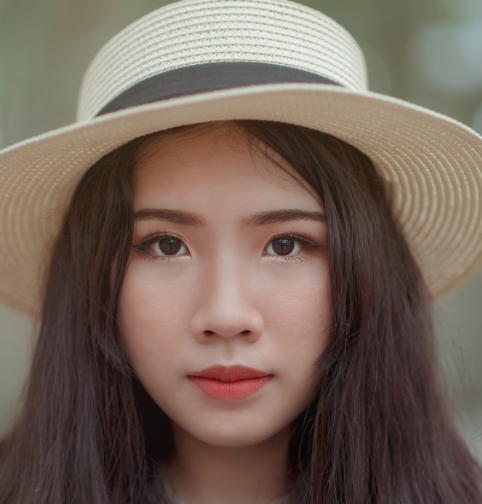

Showing 'L' image


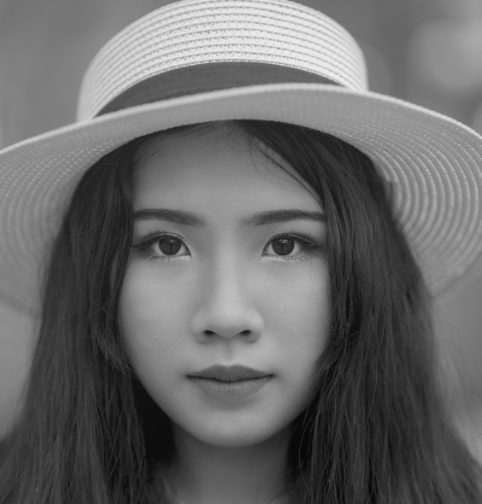

In [7]:
from IPython.display import display
from PIL import Image, ImageOps

# Load PNG image:
img = Image.open("/content/face_test.png")
print("Format: '{}', size: '{}', mode: '{}'".format(img.format, img.size, img.mode))

# Converting the images to grayscale:
img_l = img.convert("L")
print("Format: '{}', size: '{}', mode: '{}'".format(img_l.format, img_l.size, img_l.mode))

# We can also use ImageOps.grayscale() to convert the image to grayscale
# The ImageOps module contains a number of ‘ready-made’ image processing operations
# ImageOps.grayscale() Convert the image to grayscale:
img_2 = ImageOps.grayscale(img)
print("Format: '{}', size: '{}', mode: '{}'".format(img_2.format, img_2.size, img_2.mode))

# Displaying the images:
print("Showing 'RGB' image")
display(img)

print("Showing 'L' image")
display(img_l)

## Saving an image

When saving an image, you can specify a different extension from its original, and the saved image will be converted to the specified format. To save the image on disk, `img.save()` method is used.

In [8]:
from PIL import Image

# Load PNG image:
img = Image.open("/content/face_test.png")

# Save it as jpg:
img.save("face_test.jpg", quality=95)

# Load it as jpg:
img = Image.open("face_test.jpg")
print("Format: '{}', size: '{}', mode: '{}'".format(img.format, img.size, img.mode))

Format: 'JPEG', size: '(482, 504)', mode: 'RGB'


## Resizing an image

To resize an image we can use `img.resize()` method.

In [9]:
# Resize the image (width, height)
img_resized = img.resize((400, 200))
print(img_resized)

<PIL.Image.Image image mode=RGB size=400x200 at 0x7F5B80F9CED0>


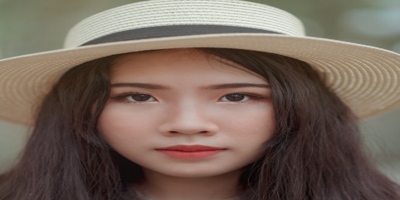

In [10]:
from IPython.display import display

display(img_resized)

## Cropping an image

To crop an image using `crop()` method, we should indicate the coordinates of the region to crop as follows: `(left, upper, right, lower)`.

In [11]:
# The region is defined by a 4-tuple, where coordinates are (left, upper, right, lower).
box = (100, 0, 400, 200)
region = img_resized.crop(box)
print(region)

<PIL.Image.Image image mode=RGB size=300x200 at 0x7F5B807449D0>


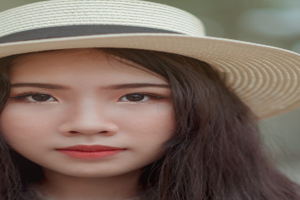

In [ ]:
display(region)

## Transposing an image

We can transpose an image using` transpose()` method. Available options are:

- `img.transpose(Image.FLIP_LEFT_RIGHT)`
- `img.transpose(Image.FLIP_TOP_BOTTOM)`
- `img.transpose(Image.ROTATE_90)`
- `img.transpose(Image.ROTATE_180)`
- `img.transpose(Image.ROTATE_270)`

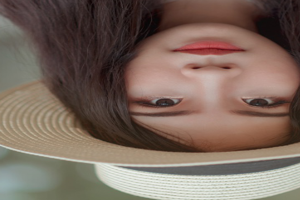

In [12]:
from PIL import Image

region_trans = region.transpose(Image.ROTATE_180)
display(region_trans)

## Processing individual bands

We can split the image into individual bands using `split()` method.

In [13]:
r_chan, g_chan, b_chan = region_trans.split()
print(r_chan)

<PIL.Image.Image image mode=L size=300x200 at 0x7F5B81030250>


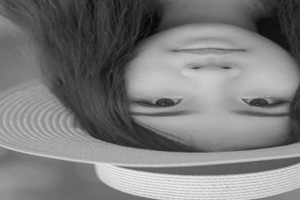

In [14]:
display(r_chan)

Moreover we can "reconstruct" an image from each channels (individual bands) using `merge()` method.

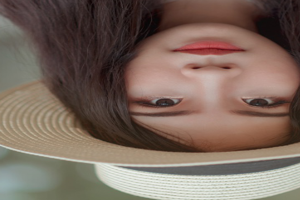

In [15]:
reconstructed_img = Image.merge("RGB", (r_chan, g_chan, b_chan))
display(reconstructed_img)

# Convert PIL to OpenCV format

We can convert PIL Image format to OpenCV format.

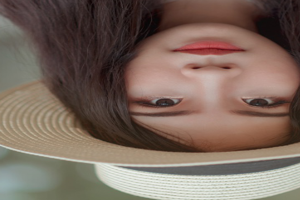

In [16]:
img = Image.merge("RGB", (r_chan, g_chan, b_chan))
display(img)

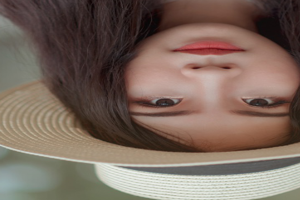

In [17]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Convert the image from PIL image format to OpenCV format:
img_rgb = np.asarray(img)
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

# Display the OpenCV image format with cv2_imshow():
cv2_imshow(img_bgr)

Therefore for converting PIL Image to OpenCV format:



In [18]:
import cv2
from PIL import Image
import numpy as np

img_bgr = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

# Convert OpenCV format to PIL

To convert OpenCV format to PIL image format we can use `Image.fromarray()` method.

In [19]:
import cv2 
from PIL import Image

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(img_rgb)

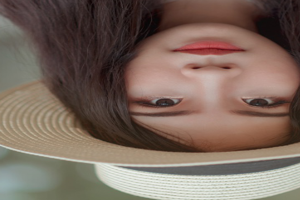

In [20]:
display(pil_image)

# Practical application with PIL using ExifTags module



In this practical example, we are going to resize an image using PIL. Therefore, we are going to load a PIL image and then perform a resize operation using `resize()`. Finally, we are going to save the image on disk using `save()` method. 
However, the main problem with this approach is that all the **Exif** information contained in the image is lost. In this sense, Exchangeable image file format (Exif) is a standard that specifies the formats for images used by digital cameras (including smartphones). 
For example, the GPS information that an image has, is stored as part of the Exif information. When working with geospatial data (e.g. images taken by drones) preserving the GPS information is a key point. Therefore, in this example, we are going to preserve the Exif information after resizing the images when saving them on disk.

First of all, we download an image from our repository. Notice that this information was captured by a drone and has GPS information (among other tags).


In [21]:
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/thermal-image.JPG -O thermal_image.jpg

--2021-03-28 10:01:13--  https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/thermal-image.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 806043 (787K) [image/jpeg]
Saving to: ‘thermal_image.jpg’

thermal_image.jpg   100%[===================>] 787.15K  --.-KB/s    in 0.08s   

2021-03-28 10:01:13 (9.42 MB/s) - ‘thermal_image.jpg’ saved [806043/806043]



To get the Exif information we should get it using `img.info['exif']`:

In [22]:
# Load image using PIL Image.open():
img = Image.open("/content/thermal_image.jpg")
print(img)

# Get the exif info:
exif = img.info['exif']

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x512 at 0x7F5B7753FB10>


This piece of code is just to show the Exif information in a friendly way, but it is not necessary. We are going to use `PIL.ExifTags` module. The `ExifTags` module exposes two dictionaries which provide constants and clear-text names for various well-known EXIF tags. [See this link if you want to see a table listing all EXIF tags](https://exiftool.org/TagNames/EXIF.html). As an example:

In [12]:
from PIL.ExifTags import TAGS

print(TAGS[0x010e])

ImageDescription


Therefore, we get all the tags contained in the image to show a clear-text representation.

In [23]:
import PIL.ExifTags

exif_visualization = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in img._getexif().items()
    if k in PIL.ExifTags.TAGS
}

print(exif_visualization)

{'ExifVersion': b'0210', 'ComponentsConfiguration': b'\x01\x02\x03\x00', 'ShutterSpeedValue': (6643, 1000), 'DateTimeOriginal': '2020:02:19 12:53:49', 'DateTimeDigitized': '2020:02:19 12:53:49', 'ApertureValue': (0, 100), 'ExposureBiasValue': (0, 1), 'MaxApertureValue': (0, 100), 'MeteringMode': 2, 'LightSource': 0, 'Flash': 0, 'FocalLength': (25000, 1000), 'ColorSpace': 1, 'ExifImageWidth': 640, 'FocalPlaneXResolution': (10880, 1000), 'FocalPlaneYResolution': (8704, 1000), 'ExifImageHeight': 512, 'FocalPlaneResolutionUnit': 4, 'ImageDescription': 'DCIM/100MEDIA/DJI_0459_R.JPG\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'Make': 'DJI', 'SubjectLocation': (320, 256, 640, 512), 'Model': 'XT2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'Orientation': 1, 'YCbCrPositioning': 1, 'FileSource': b'\x03', 'XResolution': (72, 1), 'YResolution': (72, 1), 'SceneType': b

At this point we can save the resized image. Notice that we are passing the parameter `exif` containing the Exif information.

In [24]:
filename = "thermal_image_2.jpg"
resized_img = img.resize((320, 256), Image.ANTIALIAS)
resized_img.save(filename, optimize=True, quality=100, exif=exif)

We load the image again and check that the Exif information was correctly stablished:

In [25]:
img_resized = Image.open("/content/thermal_image_2.jpg")
print(img_resized)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x256 at 0x7F5B80756590>


In [26]:
import PIL.ExifTags

exif_visualization_2 = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in img_resized._getexif().items()
    if k in PIL.ExifTags.TAGS
}

print(exif_visualization_2)

{'ExifVersion': b'0210', 'ComponentsConfiguration': b'\x01\x02\x03\x00', 'ShutterSpeedValue': (6643, 1000), 'DateTimeOriginal': '2020:02:19 12:53:49', 'DateTimeDigitized': '2020:02:19 12:53:49', 'ApertureValue': (0, 100), 'ExposureBiasValue': (0, 1), 'MaxApertureValue': (0, 100), 'MeteringMode': 2, 'LightSource': 0, 'Flash': 0, 'FocalLength': (25000, 1000), 'ColorSpace': 1, 'ExifImageWidth': 640, 'FocalPlaneXResolution': (10880, 1000), 'FocalPlaneYResolution': (8704, 1000), 'ExifImageHeight': 512, 'FocalPlaneResolutionUnit': 4, 'ImageDescription': 'DCIM/100MEDIA/DJI_0459_R.JPG\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'Make': 'DJI', 'SubjectLocation': (320, 256, 640, 512), 'Model': 'XT2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'Orientation': 1, 'YCbCrPositioning': 1, 'FileSource': b'\x03', 'XResolution': (72, 1), 'YResolution': (72, 1), 'SceneType': b

# Exploring other modules

As another example, we are going to explore [ImageFilter](https://pillow.readthedocs.io/en/3.0.x/reference/ImageFilter.html) module. The ImageFilter module contains definitions for a pre-defined set of filters, which can be be used with the `Image.filter()` method.

displaying gaussian blur filter


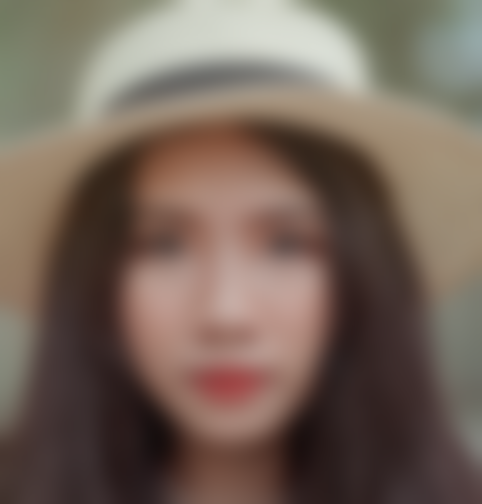

displaying unsharp mask filter


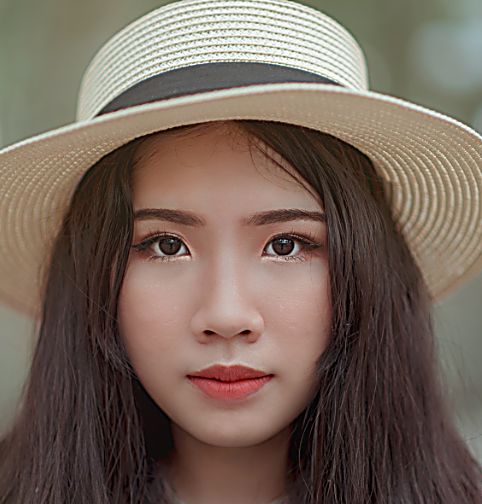

In [27]:
from IPython.display import display
from PIL import Image, ImageFilter

# Load PNG image:
img = Image.open("/content/face_test.png")

# Apply some blurring filters:
# ImageFilter.GaussianBlur(radius=2)
img_gaussian_blur = img.filter(ImageFilter.GaussianBlur(radius=10))

# Appy Unsharp masking filter:
# Unsharp maskingis an image sharpening technique, 
# often available in digital image processing software. 
# ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3)
img_unsharp_mask = img.filter(ImageFilter.UnsharpMask)

print("displaying gaussian blur filter")
display(img_gaussian_blur)

print("displaying unsharp mask filter")
display(img_unsharp_mask)

# Conclusions

In this notebook, an introduction to PIL was given. Among other things, we have seen:
- How to load an image
- How to save an image
- How to resize an image
- How to transpose an image
- How to convert PIL image format to OpenCV image format
- How to convert OpenCV image format to PIL image format

Additionally, we have also covered a practical application using PIL `ExifTags` module. And to conclude, we have explored `ImageFilter` module, which contains definitions for a pre-defined set of filters.

[Click here to see all the modules included in PIL](https://pillow.readthedocs.io/en/3.0.x/reference/index.html).

